<a href="https://colab.research.google.com/github/JulioCFSdev/Redes-Neurais-Artificiais/blob/main/atividade_2.2/Lucas_Julio_RNA_2022_2_AA2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Neurais Artificiais 2022.2
## Atividade Avaliativa 2.2

- **Disciplina**: Redes Neurais Artificiais 2022.2  
- **Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
- **Github**: http://github.com/elloa  

O Abalone é um gênero (_Haliotis_) de um moluscos gastrópodes marinhos da família _Haliotidae_. Foi identificado por Linnaeus em 1758 e suas diversas espécies podem ser encontradas em águas costeiras de quase todo o mundo. É usado na indústria alimentícia e em itens decorativos, tais como jóias ou instrumentos musicais [1](https://pt.wikipedia.org/wiki/Abalone). A idade do abalone pode ser obtida diretamente a partir de medidas físicas, porém é necessário cortar a concha, efetuar um processo de pigmentação, e então contar o número de anéis por meio de um microscópio -- tarefa considerada monótona e custosa [2](https://archive.ics.uci.edu/ml/datasets/Abalone).

Outras medidas do Abalone, entretanto, são mais fáceis de obter, não danificam a concha e podem ser utilizadas para estimar a idade com um modelo inteligente por meio de um processo de Aprendizado Supervisionado. Nesta Atividade Avaliativa de caráter prático, almeja-se a proposição e avaliação de múltiplas Redes Neurais Artificiais (RNAs) do tipo _Feedforward Multilayer Perceptron_ (MLP) para o problema da classificação multi-classe da idade do abalone a partir de atributos preditores.

Base de dados original: https://archive.ics.uci.edu/ml/datasets/Abalone  
Base de dados preparada: abalone.csv (Disponível no Google Classroom)  
Base de dados a ser utilizada: abalone.csv com One-Hot-Encoding do atributo Sex (exportar a partir da Atividade Avaliativa 1.2)

## Equipe

Integrante 1 (Matrícula)  
Integrante 2 (Matrícula)

In [ ]:
## bibliotecas
##Equipe = {
##    Lucas: 0000000000,
##    Julio: 0000000000
##}

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier, MLPRegressor
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

## Aquecimento

1. Abrir a base de dados
2. Separar os atributos preditores (X) e o atributo-alvo (y) nas respectivas variáveis
3. Imprimir a dimensão da base de dados (quantidade de exemplos, quantidade de atributos preditores)
4. Efetue uma partição holdout 70/30 com o sklearn, distribuindo os exemplos de maneira aleatória

In [ ]:
url = 'https://raw.githubusercontent.com/JulioCFSdev/Redes-Neurais-Artificiais/main/atividade_2.2/abalone-One-Hot-Encoding.csv?token=GHSAT0AAAAAAB46FRJ33OA3AVRZPV2S6ZHQY7ZGJGA'
data = pd.read_csv(url)

In [ ]:
print(len(data))
data.info()

4176
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4176 non-null   float64
 1   Diameter        4176 non-null   float64
 2   Height          4176 non-null   float64
 3   Whole weight    4176 non-null   float64
 4   Shucked weight  4176 non-null   float64
 5   Viscera weight  4176 non-null   float64
 6   Shell weight    4176 non-null   float64
 7   Age             4176 non-null   int64  
 8   Sex_F           4176 non-null   int64  
 9   Sex_I           4176 non-null   int64  
 10  Sex_M           4176 non-null   int64  
dtypes: float64(7), int64(4)
memory usage: 359.0 KB


In [ ]:
predictive_attributes = data.drop(columns=['Age'], axis=1)
target_attributes = data.Age

In [ ]:
print("Quantidade de atributos preditores : {}".format(len(predictive_attributes)))
predictive_attributes.head()

Quantidade de atributos preditores : 4176


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,1
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,0,0
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,0,1
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,1,0
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,0,1,0


In [ ]:
predictive_attributes.tail()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
4171,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1,0,0
4172,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0,0,1
4173,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0,0,1
4174,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1,0,0
4175,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,0,0,1


In [ ]:
target_attributes

0        7
1        9
2       10
3        7
4        8
        ..
4171    11
4172    10
4173     9
4174    10
4175    12
Name: Age, Length: 4176, dtype: int64

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(predictive_attributes, target_attributes,test_size=0.30,shuffle=True)

In [ ]:
print("X_train : {}\nX_test : {}\nY_train: {}\nY_test : {}".format(len(X_train),len(X_test), len(Y_train), len(Y_test)))
print("Porcentagem de dados X_train : {}\nPorcentagem de dados X_test : {}".format(len(X_train)/len(data), len(X_test)/len(data)))

X_train : 2923
X_test : 1253
Y_train: 2923
Y_test : 1253
Porcentagem de dados X_train : 0.6999521072796935
Porcentagem de dados X_test : 0.3000478927203065


In [ ]:
X_test

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
2888,0.520,0.400,0.110,0.5970,0.2935,0.1155,0.1600,0,1,0
671,0.530,0.410,0.165,0.8115,0.2400,0.1690,0.2400,1,0,0
1500,0.630,0.455,0.150,1.1315,0.4810,0.2745,0.3050,0,0,1
382,0.470,0.375,0.120,0.5565,0.2260,0.1220,0.1950,0,0,1
2418,0.465,0.360,0.120,0.4765,0.1920,0.1125,0.1600,1,0,0
...,...,...,...,...,...,...,...,...,...,...
2619,0.695,0.550,0.155,1.8495,0.7670,0.4420,0.4175,1,0,0
1814,0.665,0.515,0.185,1.3405,0.5595,0.2930,0.4375,1,0,0
919,0.415,0.330,0.090,0.3595,0.1700,0.0810,0.0900,0,1,0
1488,0.605,0.485,0.165,0.9515,0.4535,0.1930,0.2765,1,0,0


## Normalização dos Atributos Preditores

O treinamento de uma RNA MLP é mais eficiente quando os valores que lhes são fornecidos como entrada são pequenos, pois isto favorece a convergência. Isto é feito por meio do escalonamento dos atributos preditores para o intervalo [0,1], mas precisa ser feito de maneira cautelosa, para que informações do conjunto de teste não sejam fornecidas no treinamento.

Há duas estratégias para tal escalonamento: normalização e padronização. Ambas possuem características particulares, vantagens e limitações, como é possível ver aqui: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

No nosso caso, vamos usar a normalização. Assim, com os atributos preditores do treinamento, isto é, X_train, deve-se efetuar as seguintes operações

X_train_norm = (X_train - min(X_train))/(max(X_train) - min(X_train))

Em seguida, o mesmo deve ser feito com os atributos preditores do conjunto de testes, mas com padronização relativa ao conjunto de treinamento:

X_test_norm = (X_test - min(X_train)))/(max(X_train) - min(X_train))

Se todo o conjunto X for utilizado no escalonamento, a rede neural receberá informações do conjunto de teste por meio dos valores mínimo e máximo utilizados para preparar os dados de treinamento, o que não é desejável.

In [ ]:
X_train_min = X_train.min()
X_train_max = X_train.max()
X_train_norm = (X_train - X_train_min)/(X_train_max - X_train_min)
X_test_norm = (X_test - X_train_min)/(X_train_max - X_train_min)

In [ ]:
X_train_norm

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
2926,0.722973,0.697479,0.172566,0.498042,0.346667,0.516381,0.448783,1.0,0.0,0.0
3045,0.689189,0.663866,0.154867,0.440854,0.364074,0.407956,0.377476,0.0,0.0,1.0
1873,0.621622,0.672269,0.123894,0.391500,0.391852,0.274571,0.274477,0.0,1.0,0.0
2777,0.689189,0.672269,0.115044,0.342146,0.303704,0.321373,0.252971,1.0,0.0,0.0
2493,0.439189,0.420168,0.115044,0.114179,0.070370,0.104524,0.117148,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
4173,0.709459,0.705882,0.181416,0.459851,0.388519,0.447738,0.346916,0.0,0.0,1.0
3959,0.831081,0.831933,0.172566,0.695260,0.568889,0.592044,0.485569,0.0,0.0,1.0
2381,0.608108,0.630252,0.132743,0.287701,0.238148,0.250390,0.241653,0.0,1.0,0.0
787,0.581081,0.563025,0.141593,0.251469,0.182593,0.315133,0.183362,1.0,0.0,0.0


In [ ]:
X_test_norm

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
2888,0.601351,0.579832,0.097345,0.233059,0.216667,0.179407,0.179400,0.0,1.0,0.0
671,0.614865,0.596639,0.146018,0.317078,0.177037,0.262871,0.269949,1.0,0.0,0.0
1500,0.750000,0.672269,0.132743,0.442421,0.355556,0.427457,0.343520,0.0,0.0,1.0
382,0.533784,0.537815,0.106195,0.217195,0.166667,0.189548,0.219015,0.0,0.0,1.0
2418,0.527027,0.512605,0.106195,0.185860,0.141481,0.174727,0.179400,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2619,0.837838,0.831933,0.137168,0.723658,0.567407,0.688768,0.470855,1.0,0.0,0.0
1814,0.797297,0.773109,0.163717,0.524285,0.413704,0.456318,0.493492,1.0,0.0,0.0
919,0.459459,0.462185,0.079646,0.140031,0.125185,0.125585,0.100170,0.0,1.0,0.0
1488,0.716216,0.722689,0.146018,0.371915,0.335185,0.300312,0.311262,1.0,0.0,0.0


## Treinando a primeira RNA MLP para o Abalone

1. Treine uma RNA MLP Classificadora para este problema com uma única camada e dez neurônios  
    1.1 Utilize a função de ativação ReLU  
    1.2 Utilize o solver Adam    
    1.3 Imprima o passo a passo do treinamento    
    1.4 Utilize o número máximo de épocas igual a 300  
2. Imprima um gráfico com a perda da RNA MLP ao longo do treinamento  
    2.1 Houve Early Stopping?  
3. Com o modelo em questão, após o treinamento, apresente:  
    3.1 Matriz de confusão para o conjunto de teste  
    3.2 Acurácia  
    3.3 F-Score  
    3.4 Precisão  
    3.5 Revocação  
    
No tocante ao Passo 3, construa funções para esta tarefa, pois serão recorrentemente utilizadas ao longo do trabalho

In [ ]:
def neural_network_classification(x_train, x_test, y_train, hidder_layer, activation_function, solver, max_epochs):
  rede = MLPClassifier(hidden_layer_sizes=hidder_layer, activation=activation_function, solver=solver, max_iter = max_epochs, early_stopping=True)
  rede.fit(x_train.values,y_train)
  y_prev = rede.predict(x_test)
  return y_prev

def plot_results(X_train, y_train, X_test, y_test, y_prev):
    fig, ax = plt.subplots(1,3, figsize=(15,5))
    ax[0].plot(X_train, y_train, '.', color = "darkblue")
    ax[0].set_title("Treinamento: " + str(len(X_train)) + " exemplos")
    ax[1].plot(X_test, y_test, '.', color="blue")
    ax[1].set_title("Teste: " + str(len(X_test)) + " exemplos")
    ax[2].plot(X_test, y_prev, '.', color="blue")
    ax[2].set_title("Previsões: " + str(len(X_test)) + " exemplos")
    #plt.xlim([0, 2*np.pi])
    plt.show()

def confusion_matrix_plot(y_test, y_prev):
  cnf_matrix = metrics.confusion_matrix(y_test, y_prev)
  fig, ax = plot_confusion_matrix(conf_mat=cnf_matrix, figsize=(10, 10), show_absolute=True, colorbar=True, )
  plt.show()

def show_metrics(y_test, y_prev):
  print("Acurácia: ",accuracy_score(y_test,y_prev))
  print("F-score: ",f1_score(y_test,y_prev, average='micro'))
  print("Precisão: ", precision_score(y_test,y_prev, average='micro'))
  print("Revocação: ", recall_score(y_test,y_prev, average='micro'))

In [ ]:
## PARAMETROS E HIPEPARÂMETROS
HIDDER_LAYER = 10
ATIVACAO = "relu"
SOLVER = 'adam'
EPOCHS = 300

In [ ]:
y_prev = neural_network_classification(X_train_norm, X_test_norm, Y_train, HIDDER_LAYER, ATIVACAO, SOLVER, EPOCHS)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


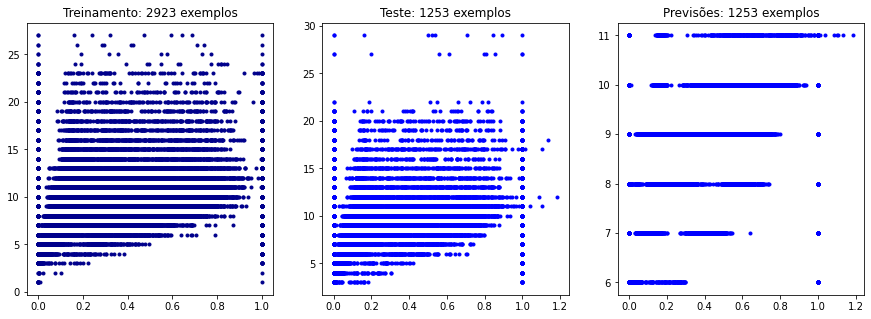

In [ ]:
plot_results(X_train_norm, Y_train, X_test_norm, Y_test, y_prev)

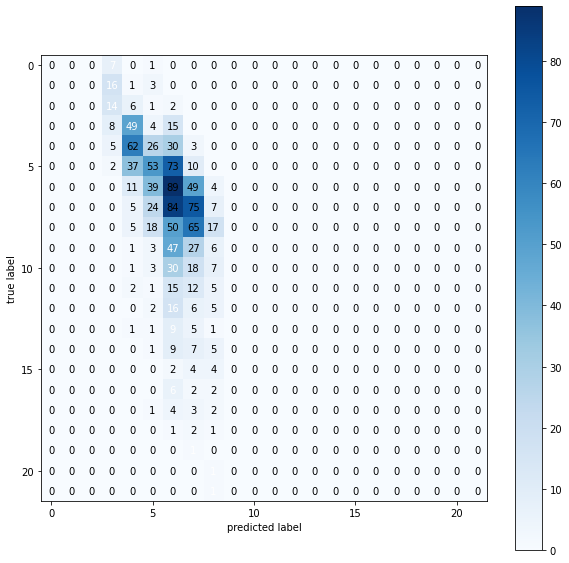

In [ ]:
confusion_matrix_plot(Y_test, y_prev)

In [ ]:
# Métricas
show_metrics(Y_test, y_prev)

Acurácia:  0.24261771747805266
F-score:  0.24261771747805266
Precisão:  0.24261771747805266
Revocação:  0.24261771747805266


## Estimando o número de neurônios

Um dos problemas de pesquisa com redes neurais artificiais consiste na determinação do número de neurônios em sua arquitetura. Embora não seja possível definir a priori qual rede neural é adequada para um problema, pois isto só é possível mediante uma busca exaustiva, há regras na literatura que sugerem o número de neurônios escondidos, tal como a regra da Pirâmide Geométrica, dada a seguir:

$$N_h = \alpha \cdot \sqrt{N_i \cdot N_o},$$

em que $N_h$ é o número de neurônios ocultos (a serem distribuídos em uma ou duas camadas ocultas), $N_i$ é o número de neurônios na camada de entrada e $N_o$ é o número de neurônios na camada de saída. 

1. Consulte a documentação da classe MLPClassifier (disponível em https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) e obtenha os valores de $N_i$ e $N_o$.
2. Teste os valores de $\alpha$ como sendo iguais a $0.5$, $2$ e $3$.
3. Proponha pelo menos 30 arquiteturas de neurônios para RNAS MLPs segundo a regra da pirâmide geométrica  
    3.1 Ao final desta etapa, deve-se obter uma lista contendo 30 elementos do tipo 2-tupla  
    3.2 Obtenha as arquiteturas usando laços, listas, tuplas, etc. Soluções _hard-coded_ são desencorajadas  

## Busca em Grade

Uma maneira padrão de escolher os parâmetros de um modelo de _Machine Learning_ é por meio de uma busca em grade via força bruta. O algoritmo da busca em grade é dado como segue:

1. Escolha a métrica de desempenho que você deseja maximizar  
2. Escolha o algoritmo de Machine Learning (exemplo: MLPClassifier). Em seguida, defina os parâmetros ou hiperparâmetros deste tipo de modelo sobre os quais você dseja otimizar (número de épocas, taxa de aprendizado, etc.) e construa um array de valores a serem testados para cada parâmetro ou hiperparâmetro.  
3. Defina a grade de busca, a qual é dada como o produto cartesiano de cada parâmetro a ser testado. Por exemplo, para os arrays [50, 100, 1000] e [10, 15], tem-se que a grade é [(50,10), (50,15), (100,10), (100,15), (1000,10), (1000,15)].
4. Para cada combinação de parâmetros a serem otimizados, utilize o conjunto de treinamento para realizar uma validação cruzada (holdout ou k-fold) e calcule a métrica de avaliação no conjunto de teste (ou conjuntos de teste)
5. Escolha a combinação de parâmetros que maximizam a métrica de avaliação. Este é o modelo otimizado.

Por que esta abordagem funciona? Porque a busca em grade efetua uma pesquisa extensiva sobre as possíveis combinações de valores para cada um dos parâmetros a serem ajustados. Para cada combinação, ela estima a performance do modelo em dados novos. Por fim, o modelo com melhor métrica de desempenho é escolhido. Tem-se então que este modelo é o que melhor pode vir a generalizar mediante dados nunca antes vistos.

Sua busca em grade deve considerar:

1. Validação Cruzada Holdout 70/30 com normalização, como definido anteriormente, com aferição de desempenho no conjunto de testes
2. Parâmetros:  
  2.1 30 arquiteturas propostas para o número de neurônios ocultos no item anterior  
  2.2 Funções de ativação (ReLU e Sigmóide)
3. Hiperparâmetros:  
  3.1 Batch_size: 16 ou 32  
  3.2 Solver: Adam  
  3.3 $\beta_1$: 1, 0.9, 0.8  
  3.4 $\beta_1$: 0.999, 0.95, 0.9  
  3.5 Paciência (n_iter_no_change): 25 ou 50    
4. Nesta busca em grande, contemple a utilização do objeto [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
5. Apresente as três propostas com melhor desempenho na busca em grade

### Argumente

"A busca em grade foi eficaz para encontrar boas RNAs MLP para o problema?"

## Otimização por Ajuste Fino (Fine-Tuning)

Considerando a etapa anterior, foram identificadas 3 melhores RNAs MLPs com seus parâmetros e hiperparâmetros para o problema da classificação multi-classe da idade do Abalone. Uma das questões remanescentes é se o número de épocas foi suficiente para o treinamento e melhor aprendizado das características do problema, mas lembrando-se de prevenir overfitting.

Com essas Top-3 RNAs identificadas, faça o que se pede:
1. Aumente o número de épocas do treinamento para 600
2. Aumenta a paciência para 60 (10% das épocas do treinamento)

Repita o treinamento e o teste das 3 melhores RNAs e verifique se houve melhoria de desempenho. Apresente detalhadamente, para cada uma das redes, as métricas de acurácia, precisão, revocação e F1-Score (weighted), bem como a matriz de confusão.

### Argumente

"Houve melhoria no desempenho após o ajuste fino?"

## Validação Cruzada k-fold

Na elaboração da busca em grade e com sua posterior otimização, fomos capazes de identificar as três melhores arquiteturas para o problema. O passo seguinte consiste em avaliar a robustez da RNA MLP com melhor desempenho. Caso os valores de desempenho tenham sido muito próximos, assuma que é a melhor rede é a que possui menos parâmetros, isto é, a menor quantidade de pesos.

Nessa etapa, vamos utilizar uma estratégia de validação cruzada ainda não explorada até o momento: a validação cruzada k-fold. Segundo a mesma, o conjunto de dados é particionado em k partes: a cada iteração, separa-se uma das partes para teste e o modelo é treinado com as k-1 partes remanescentes. Valores sugestivos de k na literatura são k = 3, 5 ou 10, pois o custo computacional desta validação dos modelos é alto. A métrica de desempenho é resultante da média dos desempenhos nas k iterações. A figura a seguir ilustra a ideia desta avaliação

<img src = "https://ethen8181.github.io/machine-learning/model_selection/img/kfolds.png" width=600></img>

Considerando a métrica de desempenho F1-Score, avalie a melhor RNA MLP no tocante ao seu desempenho em uma validação cruzada $10$-fold. Consulte: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html. Apresente claramente os resultados obtidos desta validação.

### Argumente

"O modelo elencado como melhor mostrou-se robusto perante a validação cruzada 10-fold?"

## Empacotando a solução

Suponha que você deva entregar este classificador ao órgão responsável pelo manejo dos abalones em uma determinada região. Para tanto, você deve fazer uma preparação do mesmo para utilização neste cenário. Uma vez que já identificou os melhores parâmetros e hiperparâmetros, o passo remanescente consiste em treinar o modelo com estes valores e todos os dados disponíveis, salvando o conjunto de pesos do modelo ao final para entrega ao cliente. Assim, finalize o projeto prático realizando tais passos.

1. Consulte a documentação a seguir:
https://scikit-learn.org/stable/modules/model_persistence.html  
2. Treine o modelo com todos os dados  
3. Salve o modelo em disco  
4. Construa uma rotina que recupere o modelo em disco  
5. Mostre que a rotina é funcional, fazendo previsões com todos os elementos do dataset e exibindo uma matriz de confusão das mesmas